## 1. Initialize connection to get data:

In [27]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
con = psycopg2.connect(database="mid_term_project", user="lhl_student", password="lhl_student", 
                       host="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com", port="5432")
cur = con.cursor()

### Task 4

In [28]:
cur.execute("SELECT crs_dep_time, COUNT(crs_dep_time) from flights GROUP BY crs_dep_time ORDER BY crs_dep_time ASC")
res = cur.fetchall()
df_flights_times = pd.DataFrame(res)

In [19]:
df_flights_times

,0,1
0,1,166
1,2,62
2,3,89
3,4,261
4,5,1275
...,...,...
1407,2355,7108
1408,2356,907
1409,2357,788
1410,2358,1070


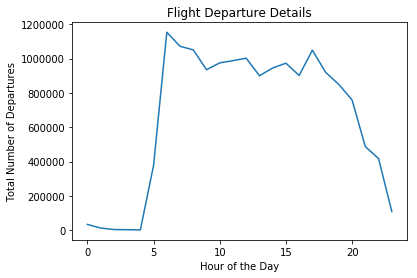

In [53]:
df_flights_times['Hour of Day'] = df_flights_times[0] // 100
plt_times = df_flights_times.groupby('Hour of Day').sum()
import matplotlib.pyplot as plt
plt.plot(plt_times.index, plt_times[1])
plt.title('Flight Departure Details')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Departures')
plt.show()

In [43]:
cur.execute("SELECT crs_dep_time, SUM(taxi_out), SUM(taxi_in) from flights GROUP BY crs_dep_time ORDER BY crs_dep_time ASC")
res = cur.fetchall()
df_flights_taxiTimes = pd.DataFrame(res)

In [44]:
df_flights_taxiTimes

,0,1,2
0,1,2664.0,1163.0
1,2,763.0,588.0
2,3,1643.0,873.0
3,4,4360.0,2001.0
4,5,19800.0,10045.0
...,...,...,...
1407,2355,122165.0,49911.0
1408,2356,14781.0,6613.0
1409,2357,11524.0,6664.0
1410,2358,15933.0,8436.0


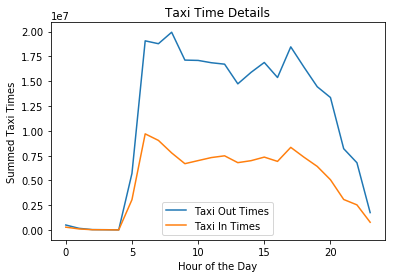

In [54]:
df_flights_taxiTimes['Hour of Day'] = df_flights_taxiTimes[0] // 100
plt_taxiTimes = df_flights_taxiTimes.groupby('Hour of Day').sum()
x1 = plt_taxiTimes.index
y1 = plt_taxiTimes[1]
x2 = plt_taxiTimes.index
y2 = plt_taxiTimes[2]
plt.plot(x1,y1,label='Taxi Out Times')
plt.plot(x2,y2,label='Taxi In Times')
plt.title('Taxi Time Details')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed Taxi Times')
plt.legend()
plt.show()

### Task 6

In [79]:
cur.execute("SELECT origin, COUNT(origin) from flights IF GROUP BY origin ORDER BY COUNT(origin) DESC")
res = cur.fetchall()
df_flights_origin = pd.DataFrame(res)

In [80]:
df_flights_origin['Percentage of Total Us Flights'] = (df_flights_origin[1] / df_flights_origin[1].sum())*100

In [81]:
df_flights_origin

,0,1,Percentage of Total Us Flights
0,ORD,790253,4.961568
1,ATL,785850,4.933924
2,DFW,584688,3.670937
3,DEN,552134,3.466549
4,CLT,501557,3.149003
...,...,...,...
371,BFM,158,0.000992
372,ROP,151,0.000948
373,AKN,124,0.000779
374,IFP,45,0.000283


In [108]:
total_percentage_top = 0
total_perc_mid = 0
total_prec_low = 0
top_fifty_percent = []
next_thirty = []
last_twenty = []
for x in df_flights_origin.index:
    if total_percentage_top < 50:
        total_percentage_top += df_flights_origin['Percentage of Total Us Flights'][x]
        top_fifty_percent.append(df_flights_origin[0][x])
    elif total_perc_mid < 30:
        total_perc_mid += df_flights_origin['Percentage of Total Us Flights'][x]
        next_thirty.append(df_flights_origin[0][x])
    elif total_prec_low < 20:
        total_prec_low += df_flights_origin['Percentage of Total Us Flights'][x]
        last_twenty.append(df_flights_origin[0][x])
print(len(top_fifty_percent), 'states make up', total_percentage_top)
print(top_fifty_percent,'\n')
print(len(next_thirty), 'states make up', total_perc_mid)
print(next_thirty,'\n')
print(len(last_twenty), 'states make up', total_prec_low)
print(last_twenty,'\n')


19 states make up 50.32315522507164
['ORD', 'ATL', 'DFW', 'DEN', 'CLT', 'LAX', 'SEA', 'SFO', 'PHX', 'IAH', 'DTW', 'LGA', 'LAS', 'MSP', 'EWR', 'PHL', 'BOS', 'DCA', 'MCO'] 

39 states make up 30.031715616118927
['JFK', 'SLC', 'BWI', 'FLL', 'SAN', 'IAD', 'MIA', 'PDX', 'MDW', 'BNA', 'TPA', 'STL', 'DAL', 'RDU', 'SJC', 'AUS', 'HOU', 'MSY', 'MCI', 'SMF', 'HNL', 'OAK', 'IND', 'CLE', 'CVG', 'PIT', 'CMH', 'SNA', 'SAT', 'MKE', 'JAX', 'RSW', 'BUR', 'BDL', 'BUF', 'RIC', 'SDF', 'OMA', 'ABQ'] 

318 states make up 19.645129158809432
['CHS', 'OGG', 'MEM', 'ORF', 'SJU', 'PBI', 'OKC', 'BOI', 'RNO', 'ONT', 'GEG', 'GRR', 'BHM', 'PVD', 'TYS', 'ANC', 'TUS', 'ELP', 'ROC', 'SAV', 'TUL', 'DSM', 'GSO', 'SYR', 'ALB', 'GSP', 'DAY', 'LGB', 'MSN', 'KOA', 'PWM', 'XNA', 'LIT', 'LIH', 'FAT', 'LEX', 'PNS', 'HPN', 'MYR', 'BTV', 'ICT', 'PSP', 'MHT', 'COS', 'MDT', 'CAE', 'HSV', 'SGF', 'CID', 'SFB', 'CHA', 'MAF', 'AVL', 'MFR', 'EUG', 'CHO', 'ILM', 'RDM', 'FSD', 'VPS', 'JAN', 'CAK', 'BZN', 'BTR', 'PIE', 'SBA', 'FWA', 'SRQ', 

In [9]:
cur.execute("SELECT * from flights LIMIT 20000;")
res = cur.fetchall()
df_flights = pd.DataFrame(res)

In [58]:
df_flights.iloc[:, 7:16]

,7,8,9,10,11,12,13,14,15
0,1383,12889,LAS,"Las Vegas, NV",10713,BOI,"Boise, ID",845,841.0
1,641,12889,LAS,"Las Vegas, NV",10792,BUF,"Buffalo, NY",915,920.0
2,2230,12889,LAS,"Las Vegas, NV",10792,BUF,"Buffalo, NY",1720,1803.0
3,193,12889,LAS,"Las Vegas, NV",10800,BUR,"Burbank, CA",1125,1121.0
4,246,14027,PBI,"West Palm Beach/Palm Beach, FL",11057,CLT,"Charlotte, NC",1353,1409.0
...,...,...,...,...,...,...,...,...,...
19995,2212,10423,AUS,"Austin, TX",11540,ELP,"El Paso, TX",2130,2145.0
19996,596,10423,AUS,"Austin, TX",11618,EWR,"Newark, NJ",700,707.0
19997,1821,10423,AUS,"Austin, TX",11618,EWR,"Newark, NJ",1850,1855.0
19998,2310,10423,AUS,"Austin, TX",11697,FLL,"Fort Lauderdale, FL",1000,1001.0


In [ ]:
df_flights[0]

In [ ]:
df_flights[0] = pd.to_datetime(df_flights[0], format='%Y-%m-%d')

In [ ]:
g = df_flights.groupby(df_flights[0].dt.strftime('%m')).count()

In [ ]:
g

In [ ]:
df_flights_datetime = df_flights.groupby(0).count()
df_flights_datetime

In [ ]:
df_flights.describe()

In [ ]:
df_flights.nunique()

In [ ]:
cur.execute("SELECT * from passengers LIMIT 10000")
res2 = cur.fetchall()
df_passengers = pd.DataFrame(res2)

In [ ]:
df_passengers